<a href="https://colab.research.google.com/github/nihcas2015/SRIP_2025/blob/main/full_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import  f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif, SelectKBest


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data=pd.read_csv("/content/drive/MyDrive/Dataset_SRIP/UNSW_2018_IoT_Botnet_Full5pc_1.csv")
data=pd.concat([data,pd.read_csv(r"/content/drive/MyDrive/Dataset_SRIP/UNSW_2018_IoT_Botnet_Full5pc_2.csv")])
data=pd.concat([data,pd.read_csv(r"/content/drive/MyDrive/Dataset_SRIP/UNSW_2018_IoT_Botnet_Full5pc_3.csv")])
data=pd.concat([data,pd.read_csv(r"/content/drive/MyDrive/Dataset_SRIP/UNSW_2018_IoT_Botnet_Full5pc_4.csv")])

<ipython-input-4-58268d3b2303>:1: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/content/drive/MyDrive/Dataset_SRIP/UNSW_2018_IoT_Botnet_Full5pc_1.csv")
<ipython-input-4-58268d3b2303>:2: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.concat([data,pd.read_csv(r"/content/drive/MyDrive/Dataset_SRIP/UNSW_2018_IoT_Botnet_Full5pc_2.csv")])
<ipython-input-4-58268d3b2303>:3: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.concat([data,pd.read_csv(r"/content/drive/MyDrive/Dataset_SRIP/UNSW_2018_IoT_Botnet_Full5pc_3.csv")])
<ipython-input-4-58268d3b2303>:4: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.concat([data,pd.read_csv(r"/content/drive/MyDrive/Dataset_SRIP/UNSW_2018_IoT_Botnet_Full5pc_4.csv")])


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3668522 entries, 0 to 668521
Data columns (total 46 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   pkSeqID                           int64  
 1   stime                             float64
 2   flgs                              object 
 3   flgs_number                       int64  
 4   proto                             object 
 5   proto_number                      int64  
 6   saddr                             object 
 7   sport                             object 
 8   daddr                             object 
 9   dport                             object 
 10  pkts                              int64  
 11  bytes                             int64  
 12  state                             object 
 13  state_number                      int64  
 14  ltime                             float64
 15  seq                               int64  
 16  dur                               float64


In [6]:
data.columns

Index(['pkSeqID', 'stime', 'flgs', 'flgs_number', 'proto', 'proto_number',
       'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes', 'state',
       'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min',
       'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate',
       'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto',
       'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP',
       'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport',
       'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP',
       'Pkts_P_State_P_Protocol_P_SrcIP', 'attack', 'category', 'subcategory'],
      dtype='object')

In [7]:
data=data.drop(columns=["pkSeqID","stime","flgs","proto","saddr","sport","daddr","dport","state","ltime","seq"])

In [8]:
data.isnull().sum()

,0
flgs_number,0
proto_number,0
pkts,0
bytes,0
state_number,0
dur,0
mean,0
stddev,0
sum,0
min,0


In [26]:
Y = data[['attack','category','subcategory']]
X= data.drop(['attack','category','subcategory'],axis=1)

In [27]:
X

,flgs_number,proto_number,pkts,bytes,state_number,dur,mean,stddev,sum,min,...,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP
0,1,1,8,1980,1,7.056393,0.068909,0.068909,0.137818,0.000000,...,772,772,1.142970,1.127040,96,75,1.133720,1.129970,770,602
1,1,2,2,120,2,0.000131,0.000131,0.000000,0.000131,0.000131,...,8,8,0.003857,15267.200000,1,2,0.005142,0.005142,2,6
2,1,1,8,2126,1,7.047852,0.064494,0.064494,0.128988,0.000000,...,772,772,1.142970,1.127040,96,75,1.135100,1.129970,770,602
3,1,1,8,2024,1,7.047592,0.064189,0.064189,0.128378,0.000000,...,772,772,1.142970,1.127040,96,75,1.135140,1.129970,770,602
4,1,1,8,2319,1,7.046841,0.063887,0.063887,0.127774,0.000000,...,772,772,1.142970,1.127040,96,75,1.135260,1.129970,770,602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668517,1,1,6,434,1,0.013165,0.013165,0.000000,0.013165,0.013165,...,475,471,9.889330,9.889330,19,19,455.754000,9.889330,30,30
668518,1,1,6,434,1,0.000574,0.000574,0.000000,0.000574,0.000574,...,475,471,9.889330,9.889330,19,19,10453.000000,9.889330,30,30
668519,1,1,31,5472,6,2.874302,2.874302,0.000000,2.874302,2.874302,...,475,471,9.889330,9.889330,19,19,10.785200,9.889330,441,441
668520,1,1,2,134,1,0.000003,0.000003,0.000000,0.000003,0.000003,...,475,4,22346.400000,666667.000000,1,3,666667.000000,22346.400000,2,4


In [24]:
list(X.columns.tolist())

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [10]:
X.head()

,flgs_number,proto_number,pkts,bytes,state_number,dur,mean,stddev,sum,min,...,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP
0,1,1,8,1980,1,7.056393,0.068909,0.068909,0.137818,0.000000,...,772,772,1.142970,1.12704,96,75,1.133720,1.129970,770,602
1,1,2,2,120,2,0.000131,0.000131,0.000000,0.000131,0.000131,...,8,8,0.003857,15267.20000,1,2,0.005142,0.005142,2,6
2,1,1,8,2126,1,7.047852,0.064494,0.064494,0.128988,0.000000,...,772,772,1.142970,1.12704,96,75,1.135100,1.129970,770,602
3,1,1,8,2024,1,7.047592,0.064189,0.064189,0.128378,0.000000,...,772,772,1.142970,1.12704,96,75,1.135140,1.129970,770,602
4,1,1,8,2319,1,7.046841,0.063887,0.063887,0.127774,0.000000,...,772,772,1.142970,1.12704,96,75,1.135260,1.129970,770,602


In [11]:
le = LabelEncoder()
Y['category'] = le.fit_transform(Y['category'])
Y['subcategory'] = le.fit_transform(Y['subcategory'])
Y.head()

<ipython-input-11-437eb0fff2ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['category'] = le.fit_transform(Y['category'])
<ipython-input-11-437eb0fff2ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['subcategory'] = le.fit_transform(Y['subcategory'])


,attack,category,subcategory
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1


In [30]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [13]:


mi_attack = mutual_info_classif(X, Y["attack"])
mi_subcat = mutual_info_classif(X, Y["subcategory"])
mi_cat    = mutual_info_classif(X, Y["category"])
mi_avg = (mi_attack + mi_subcat + mi_cat) / 3



AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [29]:
df_mi = pd.DataFrame({
    'feature': X.columns.tolist(),
    'MI_attack': mi_attack,
    'MI_subcategory': mi_subcat,
    'MI_category': mi_cat,
    'MI_average': mi_avg
})

df_mi_sorted = df_mi.sort_values(by='MI_average', ascending=False)
top_features = df_mi_sorted.head(20)['feature'].tolist()
X = X[top_features]

In [37]:
X

array([[-6.93336877e-02, -6.17955266e-01, -3.91684059e-02, ...,
        -6.85818199e-01,  2.40304549e-01,  5.37648117e-02],
       [ 3.65687740e+00, -9.46342392e-01, -3.93029570e-02, ...,
        -6.85729906e-01, -1.14396406e-01, -1.11673370e+00],
       [-6.93336877e-02, -6.18352750e-01, -3.91684059e-02, ...,
        -6.85818199e-01,  2.40304549e-01,  5.37648117e-02],
       ...,
       [-6.71949489e-02, -8.12583079e-01, -3.81352936e-02, ...,
         1.25145074e+00,  6.37376990e-02, -4.07387088e-01],
       [ 1.62653442e+02, -9.46348349e-01,  2.60023363e+00, ...,
        -6.85816177e-01, -1.12436208e-01, -1.12286196e+00],
       [-6.96041753e-02,  3.85183376e+01, -3.93011839e-02, ...,
        -6.85764280e-01, -1.12436208e-01, -1.10447717e+00]])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


In [32]:
data['category'].value_counts()

,count
category,
DDoS,1926624
DoS,1650260
Reconnaissance,91082
Normal,477
Theft,79


In [33]:
data["attack"].value_counts()

,count
attack,
1,3668045
0,477


In [34]:
data["subcategory"].value_counts()

,count
subcategory,
UDP,1981230
TCP,1593180
Service_Scan,73168
OS_Fingerprint,17914
HTTP,2474
Normal,477
Keylogging,73
Data_Exfiltration,6


In [35]:
base_model = LogisticRegression(max_iter=50, random_state=42)

rfe_selector = RFE(estimator=base_model, n_features_to_select=15, step=1)
rfe_selector = rfe_selector.fit(X_train, y_train['attack'])

rfe_selector1 = RFE(estimator=base_model, n_features_to_select=15, step=1)
rfe_selector1 = rfe_selector1.fit(X_train, y_train['subcategory'])

rfe_selector2 = RFE(estimator=base_model, n_features_to_select=15, step=1)
rfe_selector2 = rfe_selector2.fit(X_train, y_train['category'])

combined_mask = rfe_selector.support_ | rfe_selector1.support_ | rfe_selector2.support_



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [38]:
X_train = pd.DataFrame(X_train, columns=top_features)  # restore column names
X_train = X_train.loc[:, X_train.columns[combined_mask]]

In [40]:
X_test = pd.DataFrame(X_test, columns=top_features)  # restore column names
X_test = X_test.loc[:, X_test.columns[combined_mask]]

In [41]:
X_train

,AR_P_Proto_P_DstIP,AR_P_Proto_P_SrcIP,srate,AR_P_Proto_P_Sport,rate,AR_P_Proto_P_Dport,proto_number,sum,mean,max,state_number,stddev,TnBPDstIP,flgs_number,sbytes,bytes,min,TnBPSrcIP,TnP_Per_Dport
0,-0.069510,-0.039256,-0.003688,-0.031831,-0.030891,-0.034279,-1.096889,-0.076159,0.882723,0.317295,-0.113221,-1.054471,0.018831,0.589191,-0.002091,-0.002254,1.694148,0.015175,-0.459477
1,-0.069609,-0.039303,-0.004079,-0.031858,-0.030927,-0.034304,1.905862,-1.013844,-1.470002,-1.622899,1.571741,-1.103813,-0.135193,-0.566552,-0.009682,-0.007117,-0.685818,-0.108103,-1.127458
2,-0.069507,-0.039254,-0.003629,-0.031829,-0.030886,-0.034278,-1.096889,-0.229654,-0.158273,0.019393,-0.113221,0.649169,0.050552,0.589191,0.000050,-0.000882,-0.685818,0.060576,-0.341508
3,-0.069530,-0.039265,-0.003687,-0.031835,-0.030891,-0.034269,0.904945,0.748693,0.741171,0.267428,0.729260,-0.980228,-0.098737,-0.566552,-0.003982,-0.003465,1.519555,-0.079438,0.917850
4,-0.069530,-0.039264,-0.003736,-0.031835,-0.030896,-0.034284,-1.096889,0.027148,1.141929,0.530337,-0.113221,-1.050689,0.013100,0.589191,-0.002091,-0.002254,1.957252,-0.013658,-0.496247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934812,-0.069491,-0.039246,-0.003462,-0.031824,-0.030871,-0.034274,0.904945,1.344483,0.896890,0.795370,0.729260,1.131050,0.050938,-0.566552,0.000189,-0.000793,-0.685818,0.060937,0.862696
2934813,-0.069503,-0.039252,-0.003676,-0.031832,-0.030890,-0.034277,-1.096889,-0.060920,0.123972,0.342947,-0.113221,1.024823,0.062399,0.589191,0.000050,-0.000882,-0.685818,0.071687,-0.215879
2934814,-0.069517,-0.039259,-0.003689,-0.031831,-0.030891,-0.034280,-1.096889,-0.082610,0.866539,0.308331,-0.113221,-1.044650,0.014044,0.589191,-0.002091,-0.002254,1.672280,0.014164,-0.505439
2934815,0.073878,0.030134,-0.004079,0.009167,-0.000807,-0.003913,-1.096889,-1.013293,-1.467240,-1.620646,-1.798182,-1.103813,-0.109284,-0.566552,-0.009821,-0.006672,-0.682993,-0.089329,-1.125926


In [42]:
"""class RandomForest:
    def __init__(self,max_depth):
        self.rfc_attack = RandomForestClassifier(max_depth=max_depth)
        self.rfc_category = RandomForestClassifier(max_depth=max_depth)
        self.rfc_subcategory = RandomForestClassifier(max_depth=max_depth)

    def fit(self,X_train,y_train):
        self.rfc_attack.fit(X_train,y_train['attack'])

        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)
        self.rfc_category.fit(features_category,y_train['category'])

        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)
        self.rfc_subcategory.fit(features_subcategory,y_train['subcategory'])

    def predict(self,X_test):
        predict_attack = self.rfc_attack.predict(X_test)

        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)
        predict_category = self.rfc_category.predict(test_category)

        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)
        predict_subcategory = self.rfc_subcategory.predict(test_subcategory)



        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})"""

"class RandomForest:\n    def __init__(self,max_depth):\n        self.rfc_attack = RandomForestClassifier(max_depth=max_depth)\n        self.rfc_category = RandomForestClassifier(max_depth=max_depth)\n        self.rfc_subcategory = RandomForestClassifier(max_depth=max_depth)\n\n    def fit(self,X_train,y_train):\n        self.rfc_attack.fit(X_train,y_train['attack'])\n\n        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)\n        self.rfc_category.fit(features_category,y_train['category'])\n\n        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)\n        self.rfc_subcategory.fit(features_subcategory,y_train['subcategory'])\n\n    def predict(self,X_test):\n        predict_attack = self.rfc_attack.predict(X_test)\n\n        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)\n        predict_category = self.rfc_category.predict(test_category)\n\n   

In [43]:
"""class NaiveBayes:
   def __init__(self):
              self.nb_attack = GaussianNB()
        self.nb_category = GaussianNB()
        self.nb_subcategory = GaussianNB()

    def fit(self,X_train,y_train):
        self.nb_attack.fit(X_train,y_train['attack'])

        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)
        self.nb_category.fit(features_category,y_train['category'])


        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)
        self.nb_subcategory.fit(features_subcategory,y_train['subcategory'])

    def predict(self,X_test):
        predict_attack = self.nb_attack.predict(X_test)

        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)
        predict_category = self.nb_category.predict(test_category)

        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)
        predict_subcategory = self.nb_subcategory.predict(test_subcategory)

        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})"""

"class NaiveBayes:\n   def __init__(self):\n              self.nb_attack = GaussianNB()\n        self.nb_category = GaussianNB()\n        self.nb_subcategory = GaussianNB()\n\n    def fit(self,X_train,y_train):\n        self.nb_attack.fit(X_train,y_train['attack'])\n\n        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)\n        self.nb_category.fit(features_category,y_train['category'])\n\n\n        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)\n        self.nb_subcategory.fit(features_subcategory,y_train['subcategory'])\n\n    def predict(self,X_test):\n        predict_attack = self.nb_attack.predict(X_test)\n\n        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)\n        predict_category = self.nb_category.predict(test_category)\n\n        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)\n        pre

In [44]:
"""class DecisionTree:
    def __init__(self,criterion,max_depth=5):
        self.dtree_attack = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth)
        self.dtree_category = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth)
        self.dtree_subcategory = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth)

    def fit(self,X_train,y_train):
        self.dtree_attack.fit(X_train,y_train['attack'])

        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)
        self.dtree_category.fit(features_category,y_train['category'])

        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)
        self.dtree_subcategory.fit(features_subcategory,y_train['subcategory'])

    def predict(self,X_test):
        predict_attack = self.dtree_attack.predict(X_test)

        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)
        predict_category = self.dtree_category.predict(test_category)

        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)
        predict_subcategory = self.dtree_subcategory.predict(test_subcategory)

        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})"""

"class DecisionTree:\n    def __init__(self,criterion,max_depth=5):\n        self.dtree_attack = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth)\n        self.dtree_category = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth)\n        self.dtree_subcategory = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth)\n\n    def fit(self,X_train,y_train):\n        self.dtree_attack.fit(X_train,y_train['attack'])\n\n        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)\n        self.dtree_category.fit(features_category,y_train['category'])\n\n        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)\n        self.dtree_subcategory.fit(features_subcategory,y_train['subcategory'])\n\n    def predict(self,X_test):\n        predict_attack = self.dtree_attack.predict(X_test)\n\n        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1

In [45]:
"""class GradientBoost:
    def __init__(self):
        self.xgb_attack = XGBClassifier()
        self.xgb_category = XGBClassifier()
        self.xgb_subcategory = XGBClassifier()

    def fit(self,X_train,y_train):
        self.xgb_attack.fit(X_train,y_train['attack'])

        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)
        self.xgb_category.fit(features_category,y_train['category'])

        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)
        self.xgb_subcategory.fit(features_subcategory,y_train['subcategory'])

    def predict(self,X_test):
        predict_attack = self.xgb_attack.predict(X_test)

        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)
        predict_category = self.xgb_category.predict(test_category)

        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)
        predict_subcategory = self.xgb_subcategory.predict(test_subcategory)

        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})"""

"class GradientBoost:\n    def __init__(self):\n        self.xgb_attack = XGBClassifier()\n        self.xgb_category = XGBClassifier()\n        self.xgb_subcategory = XGBClassifier()\n\n    def fit(self,X_train,y_train):\n        self.xgb_attack.fit(X_train,y_train['attack'])\n\n        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)\n        self.xgb_category.fit(features_category,y_train['category'])\n\n        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)\n        self.xgb_subcategory.fit(features_subcategory,y_train['subcategory'])\n\n    def predict(self,X_test):\n        predict_attack = self.xgb_attack.predict(X_test)\n\n        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)\n        predict_category = self.xgb_category.predict(test_category)\n\n        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)

In [46]:
def display_metrics(y_true, y_pred, title):
  print(f"--- {title} ---")
  print("\nClassification Report:")
  report = classification_report(y_true, y_pred, output_dict=True)
  df = pd.DataFrame(report).transpose()
  print(df[:-3])

  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title(f"Confusion Matrix for {title}")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

  print("Accuracy:",df["precision"][-3])

**Random Forest**

In [47]:
"""rf = RandomForest(max_depth=3)
rf.fit(X_train,y_train)

predictions_rfc = rf.predict(X_test)"""

'rf = RandomForest(max_depth=3)\nrf.fit(X_train,y_train)\n\npredictions_rfc = rf.predict(X_test)'

In [48]:
"""
display_metrics(y_test['attack'], predictions_rfc['attack'], "Attack Prediction")"""



'\ndisplay_metrics(y_test[\'attack\'], predictions_rfc[\'attack\'], "Attack Prediction")'

In [49]:
#display_metrics(y_test['category'], predictions_rfc['category'], "Category Prediction")


In [50]:
#display_metrics(y_test['subcategory'], predictions_rfc['subcategory'], "Subcategory Prediction")

Naive Bayes

In [51]:
#nb = NaiveBayes()
#nb.fit(X_train,y_train)

#predictions_nb = nb.predict(X_test)

In [52]:
#display_metrics(y_test['attack'], predictions_nb['attack'], title="Attack")

In [53]:
#display_metrics(y_test['category'], predictions_nb['category'], title="Category")

In [54]:
#display_metrics(y_test['subcategory'], predictions_nb['subcategory'], title="Subcategory")

**Decision Tree **

In [55]:
#dtree = DecisionTree("gini")
##dtree.fit(X_train,y_train)
#predictions_dtree = dtree.predict(X_test)

In [56]:
#display_metrics(y_test['attack'], predictions_dtree['attack'], title="Attack")

In [57]:
#display_metrics(y_test['category'], predictions_dtree['category'], title=" Category")

In [58]:
#display_metrics(y_test['subcategory'], predictions_dtree['subcategory'], title=" Subcategory")

**Gradient Boost**

In [59]:
#xgb = GradientBoost()
#xgb.fit(X_train,y_train)
#predictions_xgb = xgb.predict(X_test)

In [60]:
#display_metrics(y_test['attack'], predictions_xgb['attack'], title="Attack")

In [61]:
#display_metrics(y_test['category'], predictions_xgb['category'], title="Category")

In [62]:
#display_metrics(y_test['subcategory'], predictions_xgb['subcategory'], title="Subcategory")

In [63]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
rf = RandomForestClassifier()


meta_model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=50)


stacked = StackingClassifier(
    estimators=[('xgb', xgb), ('rf', rf)],
    final_estimator=meta_model,
    cv=5
)


stacked.fit(X_train, y_train["subcategory"])



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:55:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:22:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:26:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:29:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:33:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

StackingClassifier(cv=5,
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=Non...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression(max_iter=50,
                                                      multi_class='multinomial'))

--- Subcategory ---

Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                   precision    recall  f1-score   support
Data_Exfiltration   0.000000  0.000000  0.000000       1.0
HTTP                1.000000  0.993939  0.996960     495.0
Keylogging          0.000000  0.000000  0.000000      15.0
Normal              1.000000  0.936842  0.967391      95.0
OS_Fingerprint      0.997207  0.996651  0.996929    3583.0
Service_Scan        0.998771  0.999317  0.999044   14634.0
TCP                 0.999934  0.999991  0.999962  318636.0
UDP                 0.999990  0.999992  0.999991  396246.0


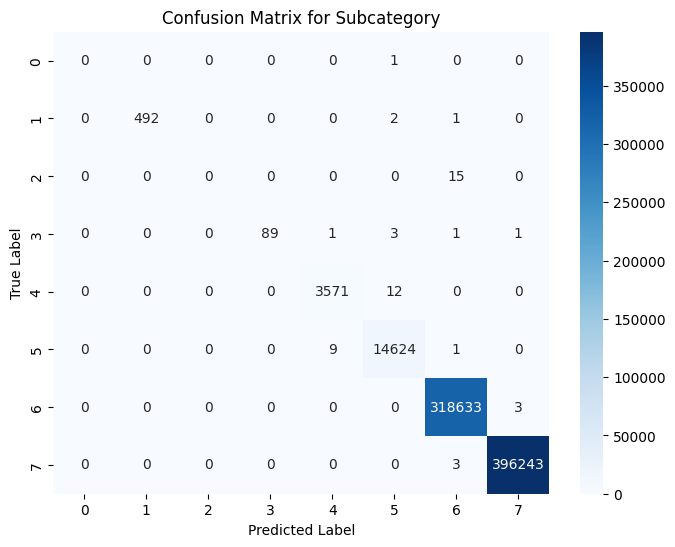

Accuracy: 0.9999277638833046


<ipython-input-46-8576f023c03b>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Accuracy:",df["precision"][-3])


In [64]:
y_pred = stacked.predict(X_test)
display_metrics(y_test["subcategory"], y_pred, title="Subcategory")



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:16:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:39:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:40:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:40:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:41:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

--- Attack ---

Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


   precision  recall  f1-score   support
0   0.000000     0.0  0.000000      95.0
1   0.999871     1.0  0.999935  733610.0


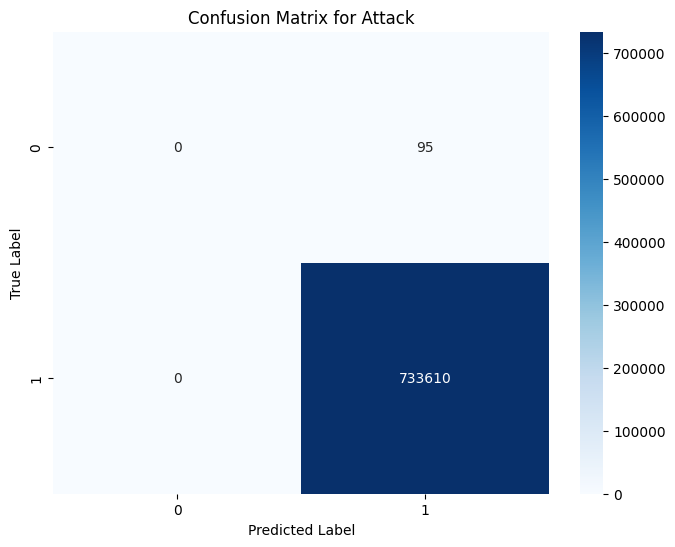

Accuracy: 0.9998705201681874


<ipython-input-46-8576f023c03b>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Accuracy:",df["precision"][-3])


In [65]:
stacked = StackingClassifier(
    estimators=[('xgb', xgb), ('rf', rf)],
    final_estimator=meta_model,
    cv=5
)


stacked.fit(X_train, y_train["attack"])
y_pred = stacked.predict(X_test)
display_metrics(y_test["attack"], y_pred,title="Attack")



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:13:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:46:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:48:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:50:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:53:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

--- category ---

Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support
DDoS             0.999943  0.999995  0.999969  385325.0
DoS              0.999952  0.999991  0.999971  330052.0
Normal           1.000000  0.726316  0.841463      95.0
Reconnaissance   0.999396  0.999890  0.999643   18217.0
Theft            0.000000  0.000000  0.000000      16.0


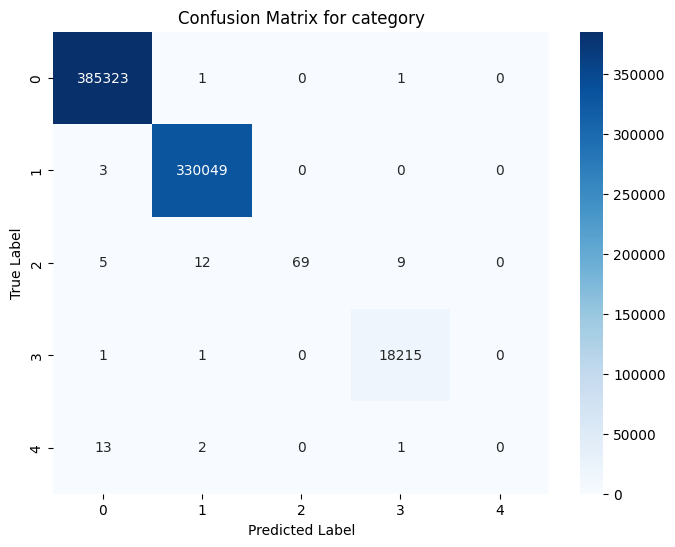

Accuracy: 0.9999332156656967


<ipython-input-46-8576f023c03b>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Accuracy:",df["precision"][-3])


In [66]:
stacked = StackingClassifier(
    estimators=[('xgb', xgb), ('rf', rf)],
    final_estimator=meta_model,
    cv=5
)


stacked.fit(X_train, y_train["category"])
y_pred = stacked.predict(X_test)
display_metrics(y_test["category"], y_pred,title="category")

